In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
cond_env = pd.read_csv("naiades_export/ConditionsEnvironnementales.CSV",sep=";")
op = pd.read_csv("naiades_export/Operations.CSV",sep=";")
stn = pd.read_csv("naiades_export/Stations.CSV",sep=";")
analyses = pd.read_csv("naiades_export/Analyses.CSV",sep=";")


/home/goncalo/anaconda3/envs/securitor_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Examiner la composition des fichiers et les métadonnées

In [3]:
cond_env.head()


,CdStationMesureEauxSurface,LbStationMesureEauxSurface,DatePrel,CdParametreEnv,LbLongParamètre,RsParEnv,CdUniteMesure,SymUniteMesure,CdRqParEn,MnemoRqParEn,...,LbQualParEnv,ComParEnv,DateParEnv,HeureParEnv,CdMethodeParEnv,NomMethodeParEnv,CdProducteur,NomProducteur,CdPreleveur,NomPreleveur
0,2045000,LA MODER À DRUSENHEIM,2018-07-31,5472,Présence rejet(s),prélèvement situé entre deux rejets,X,X,1,Résultat > seuil de quantification et < au seu...,...,Non qualifié,NaN,2018-07-31,NaN,0,Méthode inconnue,1.857030e+13,AGENCE DE L'EAU RHIN-MEUSE,7.568001e+13,Eurofins IPL Est - Maxéville
1,2045000,LA MODER À DRUSENHEIM,2018-05-16,5472,Présence rejet(s),prélèvement situé entre deux rejets,X,X,1,Résultat > seuil de quantification et < au seu...,...,Non qualifié,NaN,2018-05-16,NaN,0,Méthode inconnue,1.857030e+13,AGENCE DE L'EAU RHIN-MEUSE,7.568001e+13,Eurofins IPL Est - Maxéville
2,2045000,LA MODER À DRUSENHEIM,2018-10-24,5472,Présence rejet(s),prélèvement situé entre deux rejets,X,X,1,Résultat > seuil de quantification et < au seu...,...,Non qualifié,NaN,2018-10-24,NaN,0,Méthode inconnue,1.857030e+13,AGENCE DE L'EAU RHIN-MEUSE,7.568001e+13,Eurofins IPL Est - Maxéville
3,2045000,LA MODER À DRUSENHEIM,2018-06-05,5472,Présence rejet(s),prélèvement situé entre deux rejets,X,X,1,Résultat > seuil de quantification et < au seu...,...,Non qualifié,NaN,2018-06-05,NaN,0,Méthode inconnue,1.857030e+13,AGENCE DE L'EAU RHIN-MEUSE,7.568001e+13,Eurofins IPL Est - Maxéville
4,2045000,LA MODER À DRUSENHEIM,2018-11-21,5472,Présence rejet(s),prélèvement situé entre deux rejets,X,X,1,Résultat > seuil de quantification et < au seu...,...,Non qualifié,NaN,2018-11-21,NaN,0,Méthode inconnue,1.857030e+13,AGENCE DE L'EAU RHIN-MEUSE,7.568001e+13,Eurofins IPL Est - Maxéville


In [4]:
analyses.head()

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,CdSupport,LbSupport,CdFractionAnalysee,LbFractionAnalysee,CdPrelevement,DatePrel,HeurePrel,DateAna,...,CommentairesAna,ComResultatAna,CdRdd,NomRdd,CdProducteur,NomProducteur,CdPreleveur,NomPreleveur,CdLaboratoire,NomLaboratoire
0,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,...,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,22670001100019,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
1,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,...,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,22670001100019,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
2,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,...,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,22670001100019,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
3,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,...,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,22670001100019,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
4,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,...,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,22670001100019,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR


In [5]:
analyses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359564 entries, 0 to 359563
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CdStationMesureEauxSurface  359564 non-null  int64  
 1   LbStationMesureEauxSurface  359564 non-null  object 
 2   CdSupport                   359564 non-null  int64  
 3   LbSupport                   359564 non-null  object 
 4   CdFractionAnalysee          359564 non-null  int64  
 5   LbFractionAnalysee          359564 non-null  object 
 6   CdPrelevement               359564 non-null  int64  
 7   DatePrel                    359564 non-null  object 
 8   HeurePrel                   356743 non-null  object 
 9   DateAna                     346082 non-null  object 
 10  HeureAna                    345938 non-null  object 
 11  CdParametre                 359564 non-null  int64  
 12  LbLongParamètre             359564 non-null  object 
 13  RsAna         

In [6]:
# Examiner les valeurs minimales / maximales / moyennes / écart type des colonnes Cd*
params = analyses.groupby(["CdParametre",'CdUniteMesure','CdSupport'])
print(params.head())
params.agg({'RsAna' : ['min','max','mean','std','median','size']})

        CdStationMesureEauxSurface          LbStationMesureEauxSurface  \
0                          2001046  LE MUHLBACH DE SCHOENAU À SCHOENAU   
1                          2001046  LE MUHLBACH DE SCHOENAU À SCHOENAU   
2                          2001046  LE MUHLBACH DE SCHOENAU À SCHOENAU   
3                          2001046  LE MUHLBACH DE SCHOENAU À SCHOENAU   
4                          2001046  LE MUHLBACH DE SCHOENAU À SCHOENAU   
...                            ...                                 ...   
347819                     2096900                LA SARRE À KESKASTEL   
347836                     2096900                LA SARRE À KESKASTEL   
347837                     2096900                LA SARRE À KESKASTEL   
348011                     2096900                LA SARRE À KESKASTEL   
357663                     2098090          LE SPIEGELBACH À VOLKSBERG   

        CdSupport LbSupport  CdFractionAnalysee LbFractionAnalysee  \
0               3       Eau              

RsAna                                    \
                                        min       max        mean         std   
CdParametre CdUniteMesure CdSupport                                             
1082        132           6          54.000  764.0000  290.052632  211.414935   
                          7          55.000  180.0000  105.642857   36.165447   
            133           3           0.010    0.0305    0.010481    0.001988   
1083        132           6           3.000    3.0000    3.000000    0.000000   
            133           3           0.001    0.0050    0.004885    0.000670   
...                                     ...       ...         ...         ...   
7750        133           3           0.100    1.6600    0.109738    0.080973   
7801        133           3           0.005    0.0230    0.005113    0.001244   
7816        133           3           0.650    0.6500    0.650000    0.000000   
7817        133           3           0.100    0.1000    0.100000    0.000000   
7893        133           3           0.001    0.0030    0.001214    0.000579   

                                                   
                                      median size  
CdParametre CdUniteMesure CdSupport                
1082        132           6          266.000   19  
                          7          110.000   14  
            133           3            0.010  257  
1083        132           6            3.000   37  
            133           3            0.005  486  
...                                      ...  ...  
7750        133           3            0.100  481  
7801        133           3            0.005  344  
7816        133           3            0.650  113  
7817        133           3            0.100  113  
7893        133           3            0.001   14  

[1096 rows x 6 columns]

<AxesSubplot:xlabel='CdParametre,CdUniteMesure,CdSupport'>

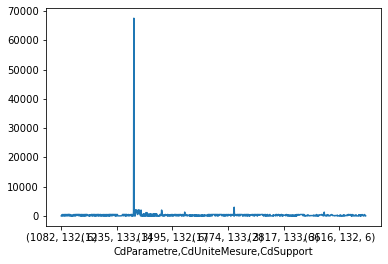

In [7]:
# Affichage de l'ordre de graudeur des paramètres
params.size().plot()

<AxesSubplot:>

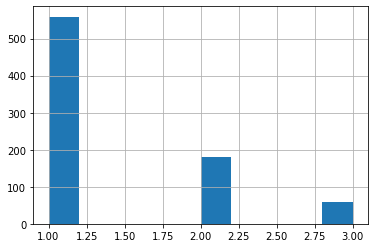

In [8]:
units = params['CdUniteMesure'].value_counts()
units.groupby('CdParametre').size().hist()

In [9]:
# On créer une data frame avex les mesures d'eaux en surface
param_series = analyses['LbLongParamètre']+' - '+analyses['SymUniteMesure']+ ' - ' + analyses['LbSupport']
analyses_light = analyses[['CdStationMesureEauxSurface','CdPrelevement','RsAna']].copy()
analyses_light['param'] = param_series
analyses_light

,CdStationMesureEauxSurface,CdPrelevement,RsAna,param
0,2001046,4548590,8.70,Température de l'Eau - °C - Eau
1,2001046,4548590,8.40,pH - unité pH - Eau
2,2001046,4548590,456.00,Conductivité - µS/cm - Eau
3,2001046,4548590,10.60,Oxygène dissous - mg(O2)/L - Eau
4,2001046,4548590,2.00,Matières en suspension - mg/L - Eau
...,...,...,...,...
359559,2098965,6152978,0.03,Ammonium - mg(NH4)/L - Eau
359560,2098965,6152978,0.03,Nitrites - mg(NO2)/L - Eau
359561,2098965,6152978,7.20,Nitrates - mg(NO3)/L - Eau
359562,2098965,6152978,10.00,Silicates - mg(SiO2)/L - Eau


In [10]:
# On observe les paramètres les moins fréquents dans les analyses
analyses_light.groupby("param").size().sort_values(ascending=False).tail(50)

param
Diisobutyl phthalate - µg/kg - Sédiments                                    5
Diisodecyl phthalate - µg/kg - Sédiments                                    5
Somme 4 DDT - µg/kg - Sédiments                                             5
Dodécyl phénol - µg/kg - Sédiments                                          5
Anthanthrene - µg/(kg MS) - Sédiments                                       5
Cobalt - mg/(kg MS) - Sédiments                                             5
Xylène-para - µg/L - Eau                                                    5
Chlorotoluène-2 - µg/(kg MS) - Sédiments                                    5
Amiodarone - µg/kg - Sédiments                                              5
Méthylphénol-3 - µg/L - Eau                                                 5
Méthylphénol-4 - µg/L - Eau                                                 5
Sélénium - mg/(kg MS) - Sédiments                                           5
Plomb diethyl - µg/kg - Sédiments                         

In [22]:
# On pivote les donnéees sur les colonnes CdStationMesureEauxSurface et CdPrelevement
an2 = analyses_light.pivot_table(values='RsAna',index=['CdStationMesureEauxSurface','CdPrelevement'],columns='param')
print(f"Percent of NaN values per columns:\n {an2.isnull().sum() * 100 / len(an2)}")
an2

Percent of NaN values per columns:
 param
(m+p)-chloroaniline - µg/L - Eau                                          99.905485
1,2,3,4,6,7,8-HpCDD - µg/kg - Sédiments                                   99.971941
1,2,3,4,6,7,8-HpCDF - µg/kg - Sédiments                                   99.971941
1,2,3,4,7,8,9-HpCDF - µg/kg - Sédiments                                   99.971941
1,2,3,4,7,8-HxCDD - µg/kg - Sédiments                                     99.971941
                                                                            ...    
tribromodiph ether 28 - µg/(kg MS) - Sédiments                            99.971941
tribromodiph ether 28 - µg/L - Eau                                        99.604218
tétrabromodiph éther 47 - µg/(kg MS) - Matières en suspension (M.E.S.)    99.979325
tétrabromodiph éther 47 - µg/(kg MS) - Sédiments                          99.971941
tétrabromodiph éther 47 - µg/L - Eau                                      99.604218
Length: 1096, dtype: float64


param                                     (m+p)-chloroaniline - µg/L - Eau  \
CdStationMesureEauxSurface CdPrelevement                                     
2001046                    4548590                                     NaN   
                           6002586                                     NaN   
                           6002635                                     NaN   
                           6002680                                     NaN   
                           6002731                                     NaN   
...                                                                    ...   
2098965                    6002268                                     NaN   
                           6013363                                     NaN   
                           6131400                                     NaN   
                           6133929                                     NaN   
                           6152978                                     NaN   

param                                     1,2,3,4,6,7,8-HpCDD - µg/kg - Sédiments  \
CdStationMesureEauxSurface CdPrelevement                                            
2001046                    4548590                                            NaN   
                           6002586                                            NaN   
                           6002635                                            NaN   
                           6002680                                            NaN   
                           6002731                                            NaN   
...                                                                           ...   
2098965                    6002268                                            NaN   
                           6013363                                            NaN   
                           6131400                                            NaN   
                           6133929                                            NaN   
                           6152978                                            NaN   

param                                     1,2,3,4,6,7,8-HpCDF - µg/kg - Sédiments  \
CdStationMesureEauxSurface CdPrelevement                                            
2001046                    4548590                                            NaN   
                           6002586                                            NaN   
                           6002635                                            NaN   
                           6002680                                            NaN   
                           6002731                                            NaN   
...                                                                           ...   
2098965                    6002268                                            NaN   
                           6013363                                            NaN   
                           6131400                                            NaN   
                           6133929                                            NaN   
                           6152978                                            NaN   

param                                     1,2,3,4,7,8,9-HpCDF - µg/kg - Sédiments  \
CdStationMesureEauxSurface CdPrelevement                                            
2001046                    4548590                                            NaN   
                           6002586                                            NaN   
                           6002635                                            NaN   
                           6002680                                            NaN   
                           6002731                                            NaN   
...                                                                           ...   
2098965                    6002268                                            NaN   
        

In [12]:
an2[an2.columns[0]].count()

64

In [13]:
an2.count().describe()

count     1096.000000
mean       324.405109
std       2054.393266
min          1.000000
25%         37.000000
50%        258.000000
75%        472.000000
max      67591.000000
dtype: float64

In [14]:
an2.count().quantile(0.9)

481.0

In [15]:
cols=[]
for col in an2.columns :
  if (an2[col].count()>=481):
    cols.append(col)
an3=an2[cols]

In [16]:
an3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 67714 entries, (2001046, 4548590) to (2098965, 6152978)
Columns: 112 entries, 2,4,5-T - µg/L - Eau to pH - unité pH - Eau
dtypes: float64(112)
memory usage: 58.8 MB


## Vérifier la cohérence des données

en particulier, pour un paramètre, est-ce que les
valeurs mesurées l’ont été dans le même contexte et avec la même unité

In [17]:
remplissage_an3 = (~an3.isnull()).sum(axis=1)
remplissage_an3.describe()

count    67714.000000
mean         2.240320
std          9.170928
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        112.000000
dtype: float64

In [18]:
an4 = an3[remplissage_an3>1]
len(an4)

2173

<AxesSubplot:>

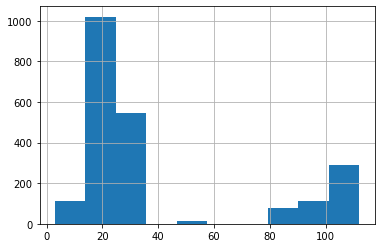

In [19]:
remplissage_an4 = (~an4.isnull()).sum(axis=1)
remplissage_an4.hist()

/home/goncalo/anaconda3/envs/securitor_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


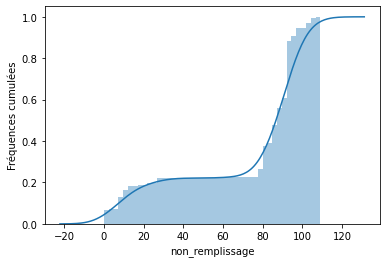

In [20]:

sns.distplot(an4.isnull().sum(axis=1), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
plt.xlabel('non_remplissage')
plt.ylabel('Fréquences cumulées')
plt.show()

/tmp/ipykernel_6046/2467675125.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(an4.corr(),dtype=np.bool))


<AxesSubplot:xlabel='param', ylabel='param'>

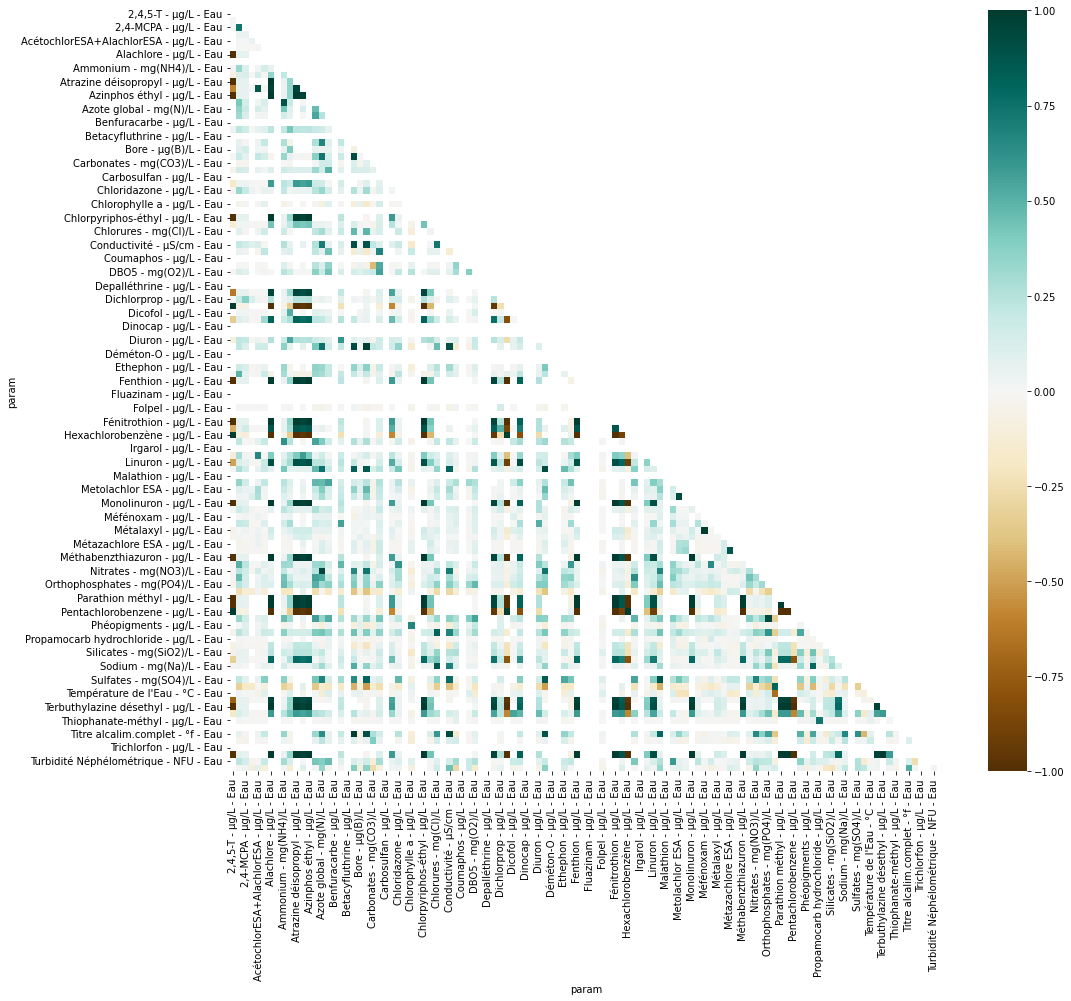

In [21]:
plt.figure(figsize=(16,14))
mask = np.triu(np.ones_like(an4.corr(),dtype=np.bool))
sns.heatmap(an4.corr(),annot=False,cmap='BrBG',mask=mask)

## Classification

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

/tmp/ipykernel_7004/1771771284.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


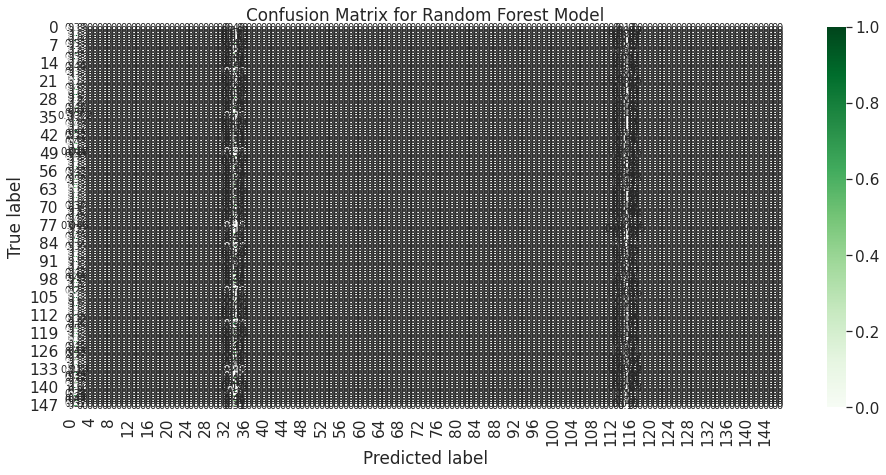

In [12]:
#on cherche à classifier le CdStationMesureEauxSurface en fonction de RsAna. 
X = analyses["RsAna"].to_numpy()
y = analyses["CdStationMesureEauxSurface"].to_numpy()

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

model = RandomForestClassifier(max_depth=2, n_jobs=7, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y)

model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()